In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import calendar

# 1️⃣ LOAD DATA
df = pd.read_excel("monthly region data.xlsx")
print(df.head())
print("datasets load successfully")

   year     month                 region  birth_count  propotion  <20  20-29  \
0  1998  December     Ayrshire and Arran          349   0.006089   29    166   
1  1998  December                Borders           76   0.001326    6     36   
2  1998  December  Dumfries and Galloway          117   0.002041   10     56   
3  1998  December                   Fife          276   0.004815   23    131   
4  1998  December           Forth Valley          269   0.004693   23    128   

   30-39  40+  Notstated  
0    147    7          0  
1     32    1          0  
2     49    2          0  
3    116    5          0  
4    113    5          0  
datasets load successfully


In [30]:
yearly = df.groupby('year')['birth_count'].sum().reset_index()
fig_yearly = px.line(yearly, x='year', y='birth_count', markers=True,
              title="📈 Total Births Per Year (All Scotland)",
              template="plotly_white")
fig_yearly.update_traces(line=dict(width=3))
fig_yearly.show()

In [31]:
region_year = df.groupby(['year','region'])['birth_count'].sum().reset_index()
fig_region_trend = px.line(region_year, x='year', y='birth_count', color='region',
              title="📊 Regional Birth Trends (Across Years)")
fig_region_trend.show()

In [32]:
month_order = list(calendar.month_name)[1:]  # Jan-Dec

# Average Births by Month (All Years Combined)
monthly_avg = df.groupby('month')['birth_count'].mean().reindex(month_order).reset_index()
fig_monthly = px.bar(monthly_avg, x='month', y='birth_count',
             title="📆 Average Births by Month (Overall Seasonality)",
             text=monthly_avg['birth_count'].round(0), color='birth_count',
             color_continuous_scale="Blues")
fig_monthly.show()

In [33]:
age_cols = ['<20','20-29','30-39','40+']

# Overall Age Group Distribution (All Years Combined)
age_dist = df[age_cols].sum().reset_index()
age_dist.columns = ['Age Group','Births']
fig_age_pie = px.pie(age_dist, names='Age Group', values='Births', hole=0.4,
             title="🥧 Maternal Age Group Distribution (All Years)")
fig_age_pie.show()

In [34]:
age_trend = df.groupby('year')[age_cols].sum().reset_index()
fig_age_trend = px.area(age_trend, x='year', y=age_cols,
              title="👩 Births by Age Group (Yearly Trend)", template="plotly_white")
fig_age_trend.show()

In [35]:
region_share = df.groupby('region')['birth_count'].sum().reset_index()
fig_region_pie = px.pie(region_share, names='region', values='birth_count', hole=0.5,
             title="🏴 Regional Birth Share (All Years)",
             color_discrete_sequence=px.colors.sequential.RdBu)
fig_region_pie.show()


In [36]:
top_region_trend = region_share.sort_values('birth_count', ascending=False).head(5)['region']
fig_top_regions = df[df['region'].isin(top_region_trend)].groupby(['year','region'])['birth_count'].sum().reset_index()
fig_top_regions = px.line(fig_top_regions, x='year', y='birth_count', color='region',
              title="🏆 Top 5 Regions Birth Trends (All Years)")
fig_top_regions.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



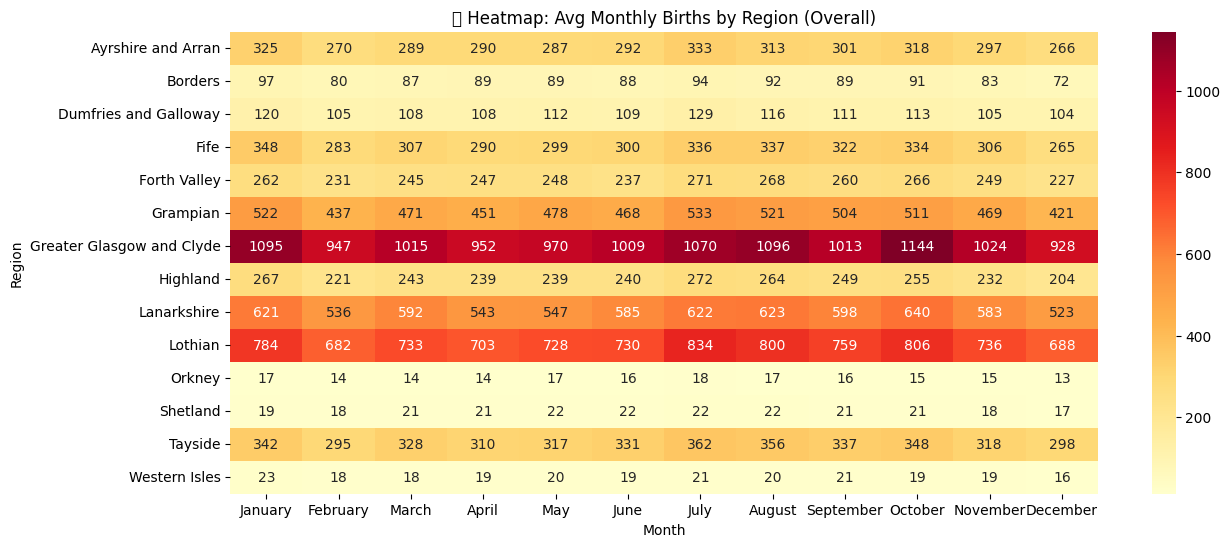

In [37]:
heat_df = df.groupby(['region','month'])['birth_count'].mean().unstack()
heat_df = heat_df[month_order]  # reorder months

plt.figure(figsize=(14,6))
sns.heatmap(heat_df, cmap="YlOrRd", annot=True, fmt=".0f")
plt.title("🔥 Heatmap: Avg Monthly Births by Region (Overall)")
plt.xlabel("Month"); plt.ylabel("Region")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.



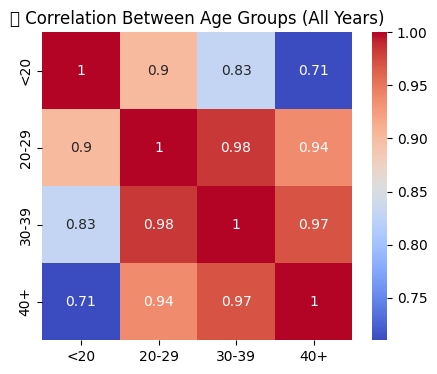

In [38]:
corr = df[age_cols].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("🔗 Correlation Between Age Groups (All Years)")
plt.show()

In [39]:
print("📌 Key Insights (Overall):")
print(f"- Peak average month: {monthly_avg.loc[monthly_avg['birth_count'].idxmax(),'month']}")
print(f"- Lowest average month: {monthly_avg.loc[monthly_avg['birth_count'].idxmin(),'month']}")
print(f"- Top birth region overall: {region_share.loc[region_share['birth_count'].idxmax(),'region']}")
print(f"- Dominant age group: {age_dist.loc[age_dist['Births'].idxmax(),'Age Group']}")

📌 Key Insights (Overall):
- Peak average month: July
- Lowest average month: December
- Top birth region overall: Greater Glasgow and Clyde
- Dominant age group: 30-39


In [40]:
import pickle

# Suppose your figures are named:
# fig_yearly, fig_region_trend, fig_monthly, fig_age_pie, fig_age_trend, fig_region_pie, fig_top_regions
# And you saved a heatmap image as 'heatmap.png'

plots = {
    "yearly": fig_yearly,
    "region_trend": fig_region_trend,
    "monthly": fig_monthly,
    "age_pie": fig_age_pie,
    "age_trend": fig_age_trend,
    "region_pie": fig_region_pie,
    "top_regions": fig_top_regions,
    "heatmap_image": "heatmap.png"  # path to saved heatmap image
}

with open("births_plots.pkl", "wb") as f:
    pickle.dump(plots, f)

print("✅ Pickle file 'births_plots.pkl' created successfully!")


✅ Pickle file 'births_plots.pkl' created successfully!
